In [ ]:
from google.colab import files
import zipfile
import io
import pandas as pd

# Upload the ZIP file
uploaded = files.upload()

# Get uploaded ZIP filename
zip_filename = list(uploaded.keys())[0]

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as z:
    z.extractall('./netflix_data')

print("Extraction complete! Files extracted to /netflix_data")

# Load the extracted CSV file
df = pd.read_csv('./netflix_data/netflix_titles.csv')
df.head()


Saving netflix_titles.csv.zip to netflix_titles.csv (1).zip
Extraction complete! Files extracted to /netflix_data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Dataset info
df.info()

# Missing values
df.isnull().sum()


Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("0")
df['date_added'] = df['date_added'].fillna("Unknown")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


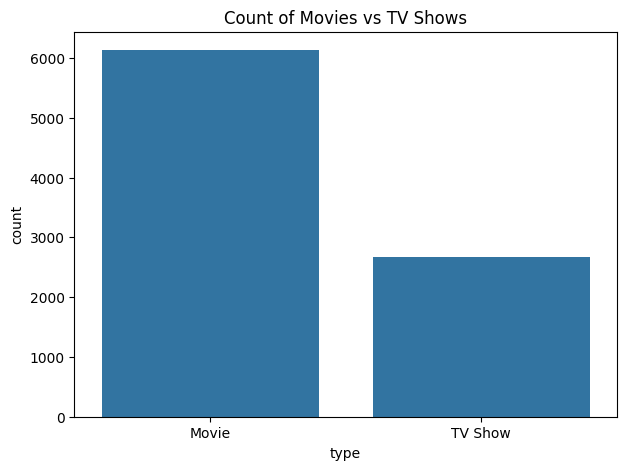

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="type")
plt.title("Count of Movies vs TV Shows")
plt.show()


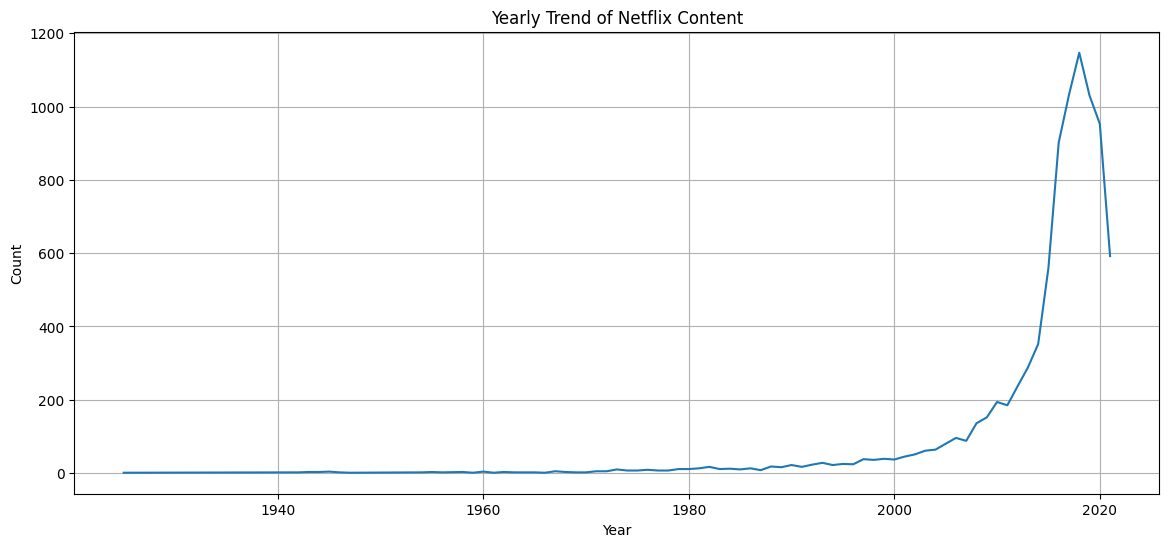

In [ ]:
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

yearly = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.plot(yearly.index, yearly.values)
plt.title("Yearly Trend of Netflix Content")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
genre_list = df["listed_in"].str.split(", ")
flattened_genres = [g for sub in genre_list for g in sub]

genre_series = pd.Series(flattened_genres)
top_genres = genre_series.value_counts().head(10)
top_genres


,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


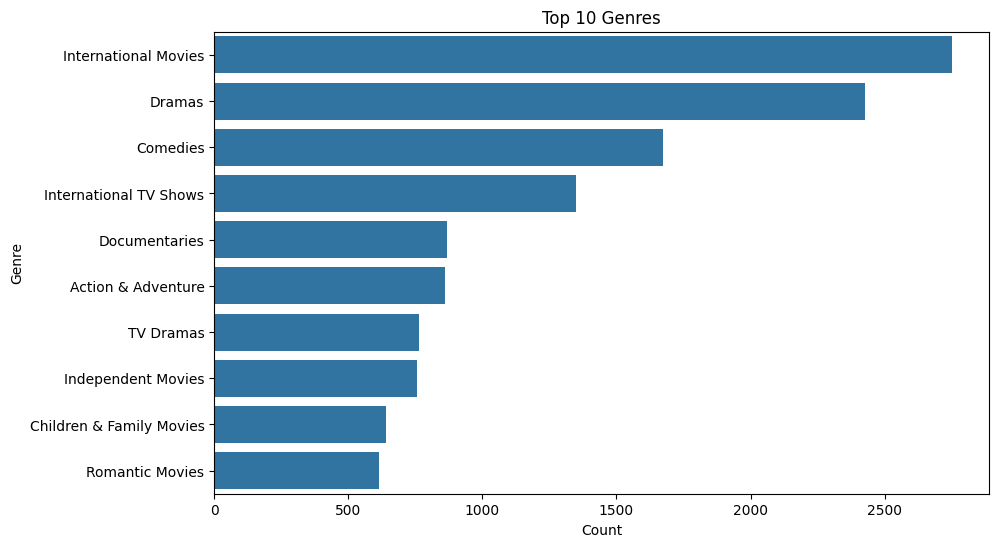

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


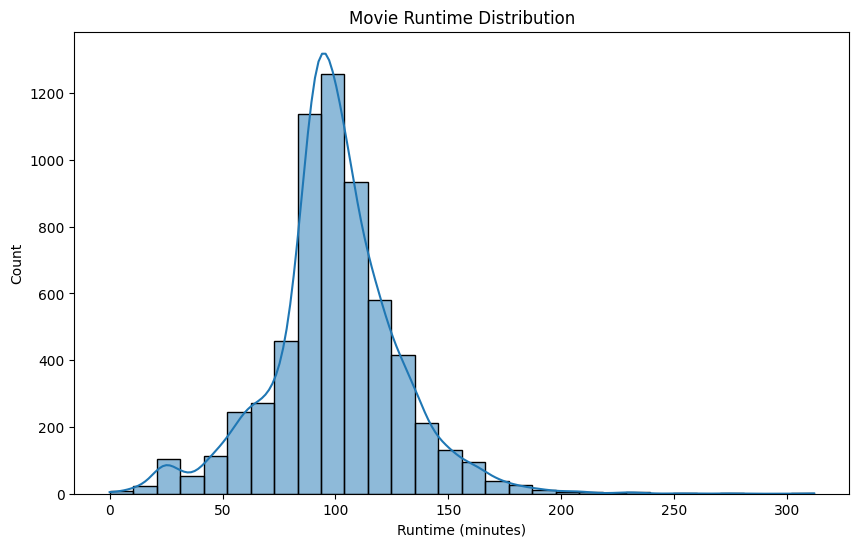

In [ ]:
movies = df[df["type"] == "Movie"].copy()

# Extract minutes
movies["runtime_min"] = movies["duration"].str.replace(" min", "").astype(int)

plt.figure(figsize=(10,6))
sns.histplot(movies["runtime_min"], bins=30, kde=True)
plt.title("Movie Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.show()


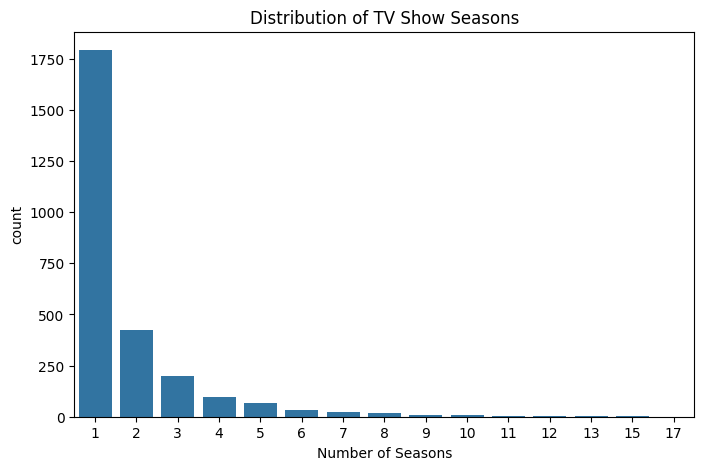

In [ ]:
tv = df[df["type"] == "TV Show"].copy()

tv["seasons"] = tv["duration"].str.replace(" Seasons","").str.replace(" Season","").astype(int)

plt.figure(figsize=(8,5))
sns.countplot(x=tv["seasons"])
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.show()


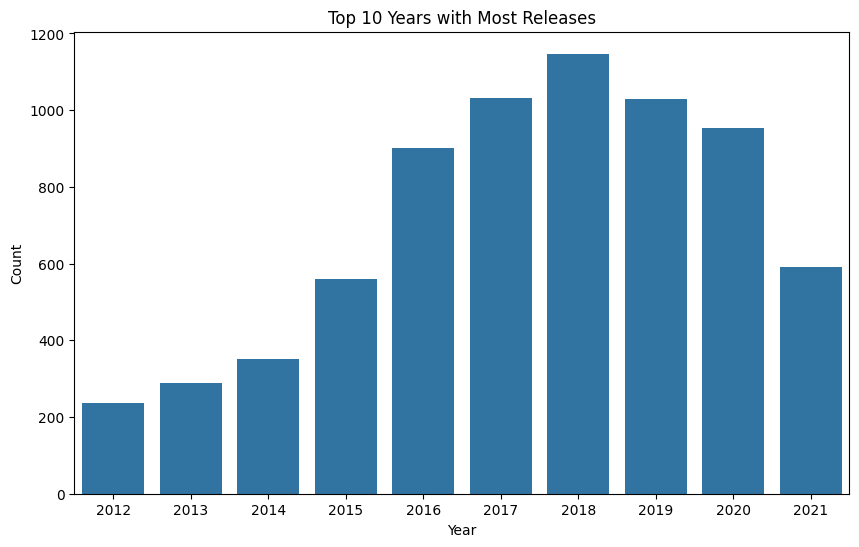

In [ ]:
top_years = yearly.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_years.index, y=top_years.values)
plt.title("Top 10 Years with Most Releases")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [13]:
print("🔍 SUMMARY INSIGHTS\n")

print("Total Records:", df.shape[0])
print("Movies:", df[df["type"]=="Movie"].shape[0])
print("TV Shows:", df[df["type"]=="TV Show"].shape[0])
print("\nMost Common Genre:", top_genres.index[0])
print("Most Active Year:", yearly.idxmax())


🔍 SUMMARY INSIGHTS

Total Records: 8807
Movies: 6131
TV Shows: 2676

Most Common Genre: International Movies
Most Active Year: 2018


In [14]:
import os
os.makedirs("Netflix_Output", exist_ok=True)

# Save example plot
plt.figure(figsize=(7,5))
sns.countplot(x=df["type"])
plt.title("Movie vs TV Show")
plt.savefig("Netflix_Output/movies_vs_tv.png")
plt.close()

print("Plots saved successfully to 'Netflix_Output' folder")


Plots saved successfully to 'Netflix_Output' folder
